In [1]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 

In [3]:
img1 = cv2.imread('Paul1.jpg',0)
img2 = cv2.imread('Paul2.jpg',0)


# Initiate ORB Detector 
orb = cv2.ORB_create()

# Find the keypoints and descriptors with ORB 

kp1 , des1 = orb.detectAndCompute(img1,None)
kp2 , des2 = orb.detectAndCompute(img2,None)

Next we create a BFMatcher object with distance measurment cv.NORM_HAMMING (since we are using ORB ) and crossCheck is switched on for better results. then we use Matcher.match() method to get the best matches in two images. We sort them in ascending order of their distances so that best matches (with low distance) come front. Then we draw only first 10 matches (Just for sake of visiblity. you can increase it as you like)

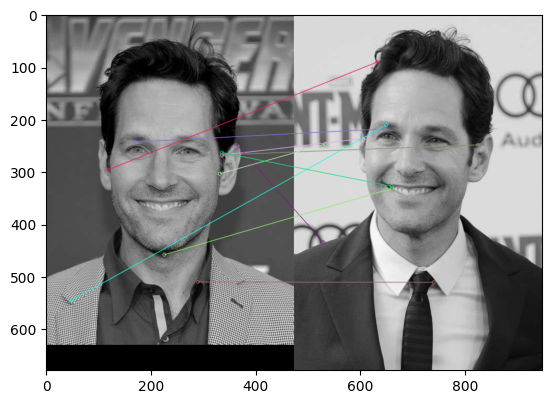

In [4]:
# Create BFMatcher object 

bf = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)

# Make descriptors 

matches = bf.match(des1,des2)

# Sort them in order of their distance
 
matches = sorted(matches,key = lambda x:x.distance)

# Draw first 10 matches

img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:10],None, flags=2)

plt.imshow(img3)
plt.show()

# What is this Matcher Object?

The result of matches = bf.match(des1,des2) line is a list of DMatch objects. This DMatch objech has following <br/> 
    - DMatch.distnace - Distance between descriptors. The lower the better it is. <br/>
    - DMatch.trainIdx - Index of the descriptor in train descriptors <br/>
    - DMatch.queryIdx - Index of the descriptor in query descriptors <br/>
    - DMatch.imgIdx - Index of the train image. <br/>

## Brute-Force Matching with SIFT Descriptors and Ratio Test 

This time, we will use BFMatcher.knnMatch() to get k best matches. In this example, we will take k=2 so that w his papaer

In [5]:
import numpy as np 
import cv2 as cv 
import matplotlib.pyplot as plt

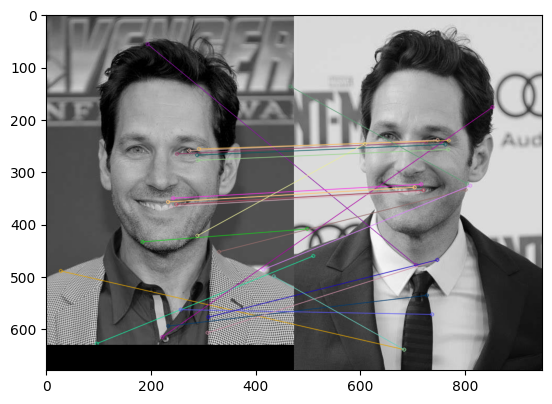

In [6]:
img1 = cv.imread('Paul1.jpg',0)
img2 = cv2.imread('Paul2.jpg',0)

# Initiate SIFT detector 
sift = cv.SIFT_create()

# find the keypoints and descriptors with SIFT 

kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# BFMatcher with default params 
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)

# Apply ration test
good = []
for m , n in matches:
    if m.distance < 0.75 * n.distance:
        good.append([m])

# CV.drawMatchesKnn expects list of lists as matches 
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3)
plt.show()

# FLANN based Matcher 

FLANN stands for Fast Library for Approximate Nearest Neighbors. It contains a collection of algorithms optimized for fast nearest neighbor search in large datasets and for high dimensional features. It works faster than BFMatcher for large datasets. We will see the second example with FLANN based matcher.

For FLANN based matcher, we need to pass two dictionaries which specifies the algorithm to be used, its related parameters etc. First one is IndexParams. For various algorithms, the information to be passed is explained in FLANN docs. As a summary, for algorithms like SIFT, SURF etc. you can pass following:

In [7]:
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)

While using ORB, you can pass the following. The commented values are recommended as per the docs, but it didn't provide required results in some cases. Other values worked fine.:

In [8]:
FLANN_INDEX_LSH = 6
index_params= dict(algorithm = FLANN_INDEX_LSH,
                   table_number = 6, # 12
                   key_size = 12,     # 20
                   multi_probe_level = 1) #2

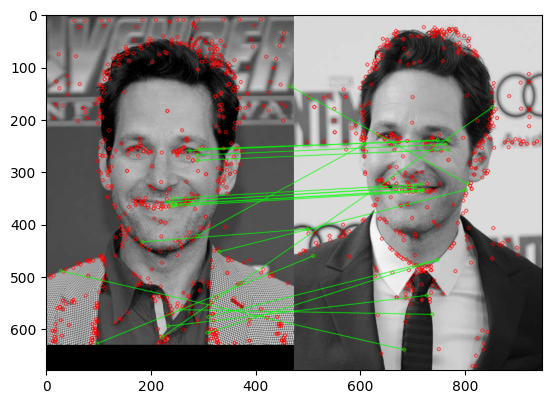

(<matplotlib.image.AxesImage at 0x21eab4276a0>, None)

In [9]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
img1 = cv.imread('Paul1.jpg',cv.IMREAD_GRAYSCALE)          # queryImage
img2 = cv.imread('Paul2.jpg',cv.IMREAD_GRAYSCALE) # trainImage
# Initiate SIFT detector
sift = cv.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary
flann = cv.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)
# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]
# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = cv.DrawMatchesFlags_DEFAULT)
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)
plt.imshow(img3,),plt.show()